<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the bloood varied with sport body size and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
while blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Details
Do blood hemoglobin concentrations of athletes in endurance-related events differ from those in power-related events?

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Import the data

In [2]:
csv_file = 'ais.csv'
data = pd.read_csv(csv_file)

### 2. Do some EDA of relationships between features.

In [3]:
data.head()

,Unnamed: 0,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  202 non-null    int64  
 1   rcc         202 non-null    float64
 2   wcc         202 non-null    float64
 3   hc          202 non-null    float64
 4   hg          202 non-null    float64
 5   ferr        202 non-null    int64  
 6   bmi         202 non-null    float64
 7   ssf         202 non-null    float64
 8   pcBfat      202 non-null    float64
 9   lbm         202 non-null    float64
 10  ht          202 non-null    float64
 11  wt          202 non-null    float64
 12  sex         202 non-null    object 
 13  sport       202 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 22.2+ KB


In [5]:
data.shape

(202, 14)

In [6]:
data.isnull().sum()

Unnamed: 0    0
rcc           0
wcc           0
hc            0
hg            0
ferr          0
bmi           0
ssf           0
pcBfat        0
lbm           0
ht            0
wt            0
sex           0
sport         0
dtype: int64

In [7]:
data['sport'].nunique()

10

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [8]:
# drop Unnamed: 0 column
data = data.drop(columns=['Unnamed: 0'])
data.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball


In [9]:
# drop sex, sport columns
data_test = data.drop(columns=['sex', 'sport'])
data_test.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [10]:
# scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_test = scaler.fit_transform(data_test)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Lets try using 2, 4. Run the clustering algorithm with each of those k values.

In [11]:
# ANSWER
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2, random_state=5).fit(data_test)
preds_2 = kmeans_2.predict(data_test)
preds_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [12]:
kmeans_4 = KMeans(n_clusters=4, random_state=5).fit(data_test)
preds_4 = kmeans_4.predict(data_test)
preds_4

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 3, 3])

### 5. Get the labels for the models

In [13]:
# ANSWER
labels_2 = kmeans_2.labels_
labels_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [14]:
labels_4 = kmeans_4.labels_
labels_4

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 3, 0, 3, 3, 3, 1, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0,
       3, 3, 3, 3])

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero. 

In [15]:
# ANSWER
# k = 2

kmeans_2 = KMeans(n_clusters=2, random_state=5).fit(data_test)
preds_2 = kmeans_2.predict(data_test)
dist_2 = kmeans_2.inertia_
dist_2

1432.8802984104345

In [16]:
# k = 4

kmeans_4 = KMeans(n_clusters=4, random_state=5).fit(data_test)
preds_4 = kmeans_4.predict(data_test)
dist_4 = kmeans_4.inertia_
dist_4

1048.4911566386397

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

C:\Users\Megan Yit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


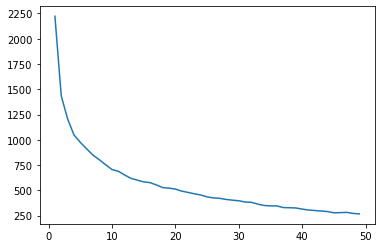

In [17]:
# ANSWER
# plot dist_n against k

dist = []

for k in range(1, 50):
    kmeans = KMeans(n_clusters=k, random_state=5).fit(data_test)
    dist_k = kmeans.inertia_
    dist.append(dist_k)
    
plt.plot(range(1, 50), dist)
#optimal k is between 1-10

### 7. Plot `ht` vs. `wt` using the clusters from each model.

- Plot ht, wt using hue sex
- Plot ht, wt using hue label

Each time, compare to the actual species classification.

In [20]:
#prepare new df containing all columns but with sex column in 0 and 1
data1 = data.copy()
data1['sex'] = data1['sex'].replace({'f': 0, 'm': 1})


#extract sex column as array for plt.plot use
actual_sex = np.array(data1['sex'])
actual_sex

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [22]:
# for own visualization
data1.drop(columns=['sex', 'sport']).head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
0,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
1,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
2,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
3,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
4,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6


In [23]:
#drop sport column
data1 = data1.drop(columns=['sport'])

#scale all variables EXCEPT sex
scaler = StandardScaler()
data1[['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']] = scaler.fit_transform(data1[['rcc', 'wcc', 'hc', 'hg', 'ferr', 'bmi', 'ssf', 'pcBfat', 'lbm', 'ht', 'wt']])

In [24]:
data1.head()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex
0,-1.660563,0.217771,-1.530301,-1.667558,-0.356163,-0.838652,1.233760,1.011027,-0.119170,1.626719,0.280193,0
1,-0.675538,0.663236,-1.338725,-1.373240,-0.187328,-0.800148,1.039822,1.262060,-0.485029,0.988226,-0.043765,0
2,-1.266553,-1.174308,-1.831348,-2.182615,-1.179234,-0.383603,1.095232,1.032082,-0.729702,-0.237268,-0.425315,0
3,-1.332221,-1.007259,-1.585037,-1.446820,-0.166223,-0.376602,1.766319,1.644279,-0.590108,0.504207,-0.007769,0
4,-0.587981,-0.172011,-0.435584,-0.416707,-1.010399,-1.398713,0.347186,0.669299,-0.895374,0.463014,-0.749273,0


C:\Users\Megan Yit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


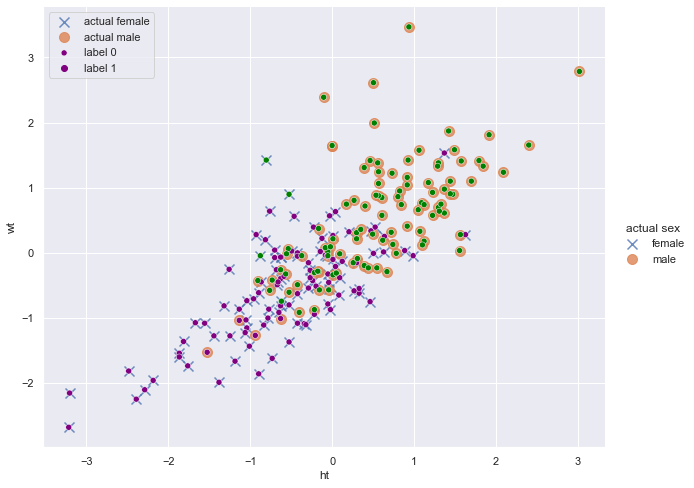

In [52]:
# k = 2
kmeans_2 = KMeans(n_clusters=2, random_state=5).fit(data_test)
preds_2 = kmeans_2.predict(data_test)


# actual SEX (0 is female, 1 is male)
g = sns.lmplot(x='ht',
           y='wt',
           data=data1,
           hue='sex',
           markers=['x', 'o'],
           scatter_kws={"s": 100},
           fit_reg=False)
g.fig.set_figwidth(10)
g.fig.set_figheight(7)
g._legend.set_title('actual sex')
# set labels manually
new_labels = ['female', 'male']
for i, label in zip(g._legend.texts, new_labels): i.set_text(label)


# predicted SEX clusters (0 is female, 1 is male)
g1 = sns.scatterplot(data_test[:, 9],
          data_test[:, 10],
          hue=preds_2,
          palette=['purple', 'green'])

plt.legend(labels=['actual female', 'actual male', 'label 0', 'label 1'])

C:\Users\Megan Yit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


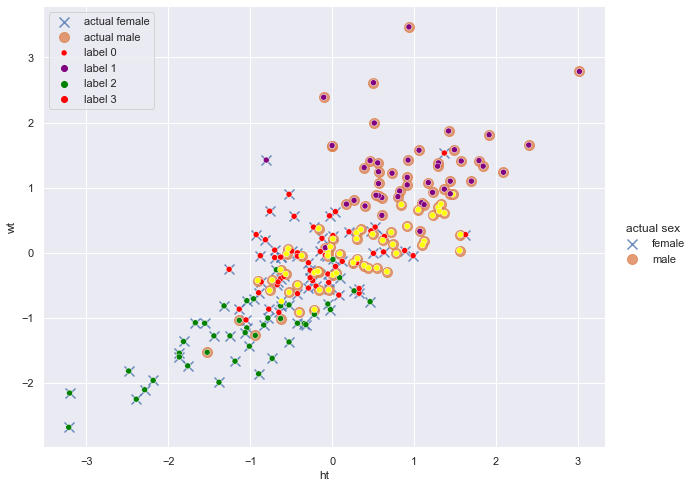

In [50]:
# k = 4
kmeans_4 = KMeans(n_clusters=4, random_state=5).fit(data_test)
preds_4 = kmeans_4.predict(data_test)


# actual SEX (0 is female, 1 is male)
g = sns.lmplot(x='ht',
           y='wt',
           data=data1,
           hue='sex',
           markers=['x', 'o'],
           scatter_kws={"s": 100},
           fit_reg=False)
g.fig.set_figwidth(10)
g.fig.set_figheight(7)
g._legend.set_title('actual sex')
# set labels manually
new_labels = ['female', 'male']
for i, label in zip(g._legend.texts, new_labels): i.set_text(label)


# predicted LABEL clusters (0 is female, 1 is male)
g1 = sns.scatterplot(data_test[:, 9],
          data_test[:, 10],
          hue=preds_4,
          palette=['purple', 'green', 'red', 'yellow'])

plt.legend(labels=['actual female', 'actual male', 'label 0', 'label 1', 'label 2', 'label 3'])

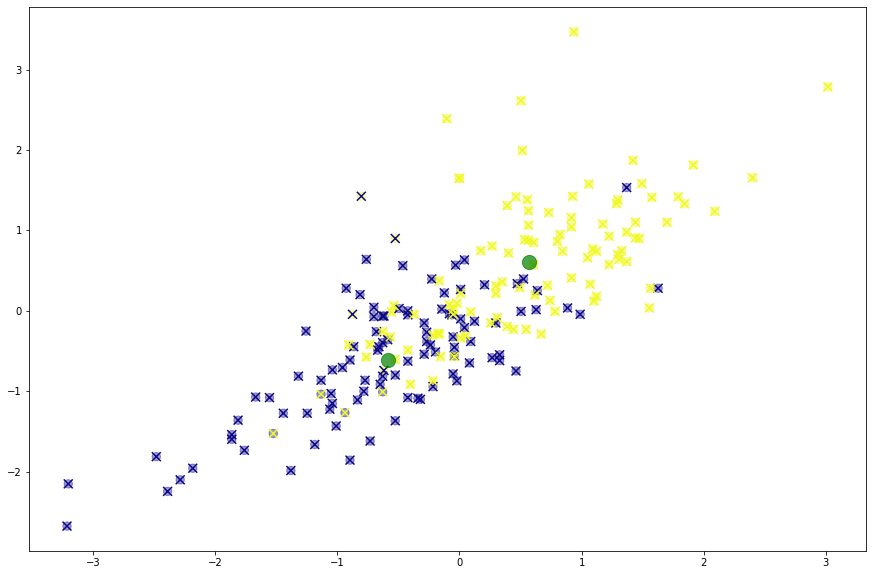

In [56]:
# using plt.plot
# SEX clusters, for k=2, ht vs wt

# kmeans_2 = KMeans(n_clusters=2, random_state=5).fit(data_test)
# preds_2 = kmeans_2.predict(data_test)
# preds_2

# plt.figure(figsize=(15,10))

# # use 'o' to plot kmeans sex
# plt.scatter(data_test[:, 9], #height
#            data_test[:, 10], #weight
#            c=preds_2,
#            s=70,
#            alpha=0.4,
#            cmap='plasma')

# # use 'x' to plot ACTUAL sex
# plt.scatter(data_test[:,9],
#            data_test[:,10],
#            c=actual_sex,
#            marker='x',
#            s=80,
#            cmap='plasma')

# centers = kmeans_2.cluster_centers_
# plt.scatter(centers[:, 9],
#            centers[:, 10],
#            c='green',
#            s=200,
#            alpha=0.7)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



